# ПРОГНОЗИРОВАНИЕ №8.5 - ПРИБЫЛЬ (КЛАССИФИКАЦИЯ на целом фрейме данных)

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu120.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.8/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpat8v0cms
  JVM stdout: /tmp/tmpat8v0cms/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpat8v0cms/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_pzd6dm
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.926 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
import h2o
from h2o.exceptions import H2OValueError
from h2o.frame import H2OFrame
from h2o.model import ModelBase
from h2o.model.extensions import has_extension
from h2o.utils.compatibility import *  # NOQA
from h2o.utils.typechecks import assert_is_type
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [3]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV8.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('Revenue_cat')
df = df.drop('Revenue_T')
df = df.drop('abc_xyz_class')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
6111,12,Natura,12,44,UrbanConvenience,Revenue_cat #49
92879,7,Pirum,12,32,RuralProductivity,Revenue_cat #43
92879,7,Pirum,12,31,RuralProductivity,Revenue_cat #43
32901,3,VanArsdel,12,94,UrbanModeration,Revenue_cat #49
84770,3,Currus,12,8,RuralSelect,Revenue_cat #49
95380,3,Abbas,12,33,UrbanModeration,Revenue_cat #49
14559,2,Natura,12,14,YouthYouth,Revenue_cat #14
16301,2,Natura,12,14,YouthYouth,Revenue_cat #14
48439,2,Quibus,12,4,RuralSelect,Revenue_cat #38
21787,2,VanArsdel,12,70,UrbanModeration,Revenue_cat #49


In [4]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [5]:
train

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
6111,12,Natura,12,44,UrbanConvenience,Revenue_cat #49
92879,7,Pirum,12,32,RuralProductivity,Revenue_cat #43
32901,3,VanArsdel,12,94,UrbanModeration,Revenue_cat #49
84770,3,Currus,12,8,RuralSelect,Revenue_cat #49
14559,2,Natura,12,14,YouthYouth,Revenue_cat #14
16301,2,Natura,12,14,YouthYouth,Revenue_cat #14
48439,2,Quibus,12,4,RuralSelect,Revenue_cat #38
7503,2,Currus,12,5,MixAll Season,Revenue_cat #38
33126,2,Natura,12,18,UrbanModeration,Revenue_cat #49
60073,2,Natura,12,26,UrbanConvenience,Revenue_cat #40


In [6]:
valid

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
92879,7,Pirum,12,31,RuralProductivity,Revenue_cat #43
95380,3,Abbas,12,33,UrbanModeration,Revenue_cat #49
21787,2,VanArsdel,12,70,UrbanModeration,Revenue_cat #49
6450,1,Natura,12,10,UrbanModeration,Revenue_cat #48
32164,1,Natura,12,10,UrbanModeration,Revenue_cat #48
6790,1,Aliqui,12,5,UrbanExtreme,Revenue_cat #38
19468,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
15212,1,Currus,12,5,UrbanExtreme,Revenue_cat #35
6444,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
50211,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49


In [7]:
unseen

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
30901,1,Natura,12,36,UrbanExtreme,Revenue_cat #35
44811,1,Natura,12,36,UrbanExtreme,Revenue_cat #35
19064,1,Natura,12,36,UrbanExtreme,Revenue_cat #35
46748,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
56097,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
92562,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
80731,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #48
13433,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
34668,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
66067,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49


# Тренировка модели

In [8]:
from h2o.estimators import H2OGradientBoostingEstimator

response_col = "Revenue_cat"

distribution = "multinomial"

predictors = ["Zip","Units","Manufacturer","MonthNo","Model_id_number", "CategoryInSegment"]

gbm = H2OGradientBoostingEstimator(nfolds=3,
                                   distribution=distribution)

gbm.train(x=predictors,
          y=response_col,
          training_frame=train,
          validation_frame=valid)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1696052467804_1


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 2450                        1.12095e+06            5            5            5             17            32            31.68

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.405270530632546
RMSE: 0.6366086165239565
LogLoss: 1.1870632306823667
Mean Per-Class Error: 0.4133496148906886
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Revenue_cat #1    Revenue_cat #10    Revenue_cat #11    Revenue_cat #12    Revenue_cat #13    Revenue_cat #14    Revenue_cat #15    Revenue_cat #16    Revenue_cat #17    Revenue_cat #18    Revenue_cat #19    Revenue_cat #2    Revenue_cat #20    Revenue_cat #21    Revenue_cat #22    Revenue_cat #23    Revenue_cat #24    Revenue_cat #25    Revenue_cat #26    Revenue_cat #27    Revenue_cat #28    Revenue_cat #29    Revenue_cat #3    Revenue_cat #30    Revenue_cat #31    Revenue_cat #32    Revenue_cat #33    Revenue_cat #34    Revenue_cat #35    Revenue_cat #36    Revenue_cat #37    Revenue_cat #38    Revenue_cat #39    Revenue_cat #4    Revenue_cat #40    Revenue_cat #41    Revenue_cat #42    Revenue_cat #43    Revenue_cat #44    Revenue_cat #45    Revenue_cat #46    Revenue_cat #47    Revenue_cat #48    Revenue_cat #49    Revenue_cat #5    Revenue_cat #6    Revenue_cat #7    Revenue_cat #8    Revenue_cat #9    Error                   Rate
----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ----------------------  -----------------
16018.0           0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0               0.0               2.0     

In [9]:
confusion_matrix = gbm.confusion_matrix(train)
confusion_matrix

Revenue_cat #1,Revenue_cat #10,Revenue_cat #11,Revenue_cat #12,Revenue_cat #13,Revenue_cat #14,Revenue_cat #15,Revenue_cat #16,Revenue_cat #17,Revenue_cat #18,Revenue_cat #19,Revenue_cat #2,Revenue_cat #20,Revenue_cat #21,Revenue_cat #22,Revenue_cat #23,Revenue_cat #24,Revenue_cat #25,Revenue_cat #26,Revenue_cat #27,Revenue_cat #28,Revenue_cat #29,Revenue_cat #3,Revenue_cat #30,Revenue_cat #31,Revenue_cat #32,Revenue_cat #33,Revenue_cat #34,Revenue_cat #35,Revenue_cat #36,Revenue_cat #37,Revenue_cat #38,Revenue_cat #39,Revenue_cat #4,Revenue_cat #40,Revenue_cat #41,Revenue_cat #42,Revenue_cat #43,Revenue_cat #44,Revenue_cat #45,Revenue_cat #46,Revenue_cat #47,Revenue_cat #48,Revenue_cat #49,Revenue_cat #5,Revenue_cat #6,Revenue_cat #7,Revenue_cat #8,Revenue_cat #9,Error,Rate
16018.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0001873,"3 / 16,021"
0.0,8662.0,382.0,30.0,33.0,3.0,0.0,3.0,0.0,59.0,0.0,0.0,0.0,46.0,1.0,8.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,490.0,2496.0,0.2925515,"3,582 / 12,244"
0.0,3037.0,11427.0,357.0,252.0,12.0,11.0,1.0,16.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,365.0,0.2675470,"4,174 / 15,601"
0.0,2232.0,2562.0,2821.0,2901.0,334.0,158.0,56.0,49.0,0.0,27.0,90.0,9.0,0.0,0.0,0.0,98.0,64.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,5.0,65.0,5.0,735.0,0.7695073,"9,418 / 12,239"
0.0,547.0,1592.0,410.0,10876.0,726.0,31.0,3.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,44.0,4.0,72.0,6.0,8.0,0.2420378,"3,473 / 14,349"
0.0,54.0,2529.0,332.0,1068.0,9291.0,109.0,116.0,0.0,2.0,0.0,0.0,7.0,0.0,2.0,0.0,41.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0,47.0,17.0,0.0,0.3185419,"4,343 / 13,634"
0.0,31.0,728.0,218.0,55.0,1728.0,10372.0,1603.0,95.0,69.0,0.0,0.0,5.0,113.0,0.0,49.0,162.0,1.0,0.0,2.0,0.0,8.0,1.0,2.0,14.0,0.0,0.0,2.0,3.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,119.0,87.0,221.0,116.0,0.3487379,"5,554 / 15,926"
0.0,0.0,0.0,7.0,1.0,267.0,1685.0,8159.0,859.0,114.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,7.0,0.0,1.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,165.0,0.0,1.0,244.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,10.0,2.0,0.0,165.0,15.0,8.0,142.0,0.3129842,"3,717 / 11,876"
0.0,2.0,7.0,170.0,106.0,23.0,948.0,2203.0,8305.0,1773.0,1.0,0.0,281.0,58.0,53.0,0.0,51.0,101.0,3.0,2.0,0.0,4.0,0.0,0.0,12.0,0.0,0.0,71.0,0.0,0.0,119.0,0.0,0.0,20.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,40.0,0.0,0.0,8.0,0.4220196,"6,064 / 14,369"
0.0,0.0,25.0,303.0,1.0,89.0,137.0,226.0,2552.0,12585.0,748.0,0.0,648.0,84.0,5.0,209.0,147.0,34.0,6.0,6.0,6.0,97.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,15.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,1.0,0.0,51.0,2.0,0.0,0.0,5.0,1.0,1.0,0.3023062,"5,453 / 18,038"


In [10]:
hit_ratio_table = gbm.hit_ratio_table() # <- Default: return training metrics
hit_ratio_table

k,hit_ratio
1,0.5978506
2,0.810862
3,0.900334
4,0.9375602
5,0.9573613
6,0.9710053
7,0.9787130
8,0.9834974
9,0.9868489
10,0.9886688


In [11]:
hit_ratio_table1 = gbm.hit_ratio_table(train=True,
                                       valid=True,
                                       xval=True)
hit_ratio_table1

{'train': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.597851
2    0.810862
3    0.900334
4    0.93756
5    0.957361
6    0.971005
7    0.978713
8    0.983497
9    0.986849
10   0.988669,
 'valid': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.595145
2    0.809084
3    0.898536
4    0.935652
5    0.955724
6    0.969055
7    0.976922
8    0.982056
9    0.985667
10   0.987719,
 'xval': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.594312
2    0.809922
3    0.898518
4    0.935349
5    0.955247
6    0.968572
7    0.977281
8    0.982
9    0.985042
10   0.987565}

In [12]:
mean_per_class_error = gbm.mean_per_class_error() # <- Default: return training metric
mean_per_class_error

0.4133496148906886

In [13]:
mean_per_class_error1 = gbm.mean_per_class_error(train=True,
                                                 valid=True,
                                                 xval=True)
mean_per_class_error1

{'train': 0.4133496148906886,
 'valid': 0.4157994766151446,
 'xval': 0.41705949966902434}

In [14]:
multinomial_auc_table = gbm.multinomial_auc_table() # <- Default: return training metric
multinomial_auc_table

"AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

In [15]:
multinomial_aucpr_table = gbm.multinomial_aucpr_table() # <- Default: return training metric
multinomial_aucpr_table

"AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

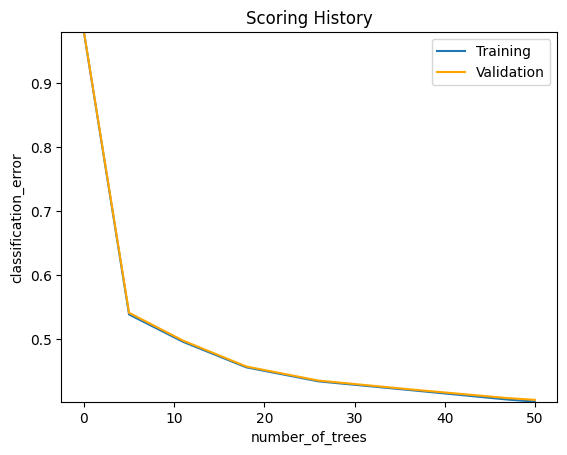

In [16]:
gbm.plot(metric="AUTO", timestep="AUTO")